In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


import seaborn as sns


import sys
sys.path.append('utils')
import math
plt.style.use('seaborn')

from sklearn.preprocessing import OrdinalEncoder

theme_colors = ["#ff8533", "#808080"]
font = 13


In [4]:
df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Final Project\Churn Project Files\DataFiles\df3_Master.csv") 

In [5]:
df2 = df.copy()

### Imputing Missing Values


In [6]:
#Checking df(abc) for any missing values
df2.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Log Transformation


c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

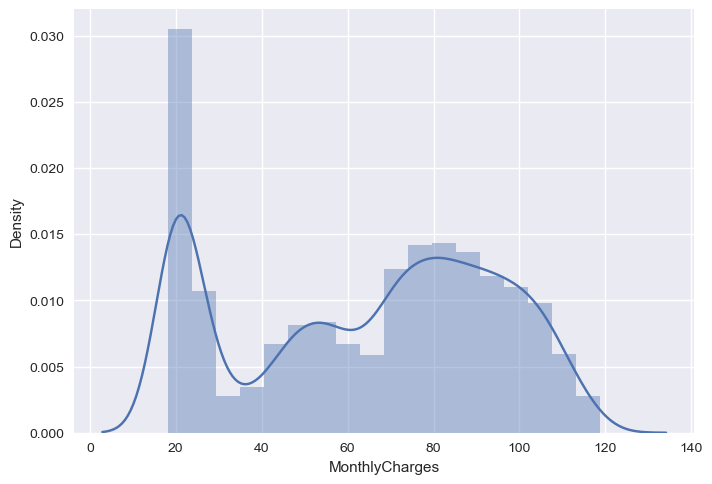

In [7]:
sns.distplot(df2['MonthlyCharges'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges_Log', ylabel='Density'>

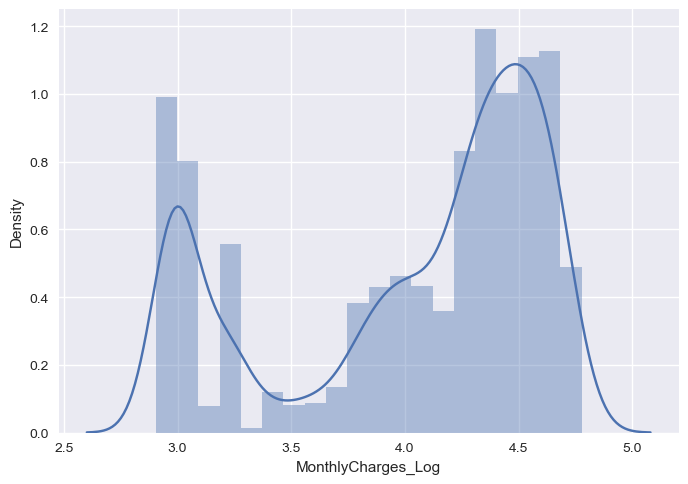

In [8]:
df2['MonthlyCharges_Log']=np.log(df2['MonthlyCharges'])
sns.distplot(df2['MonthlyCharges_Log'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

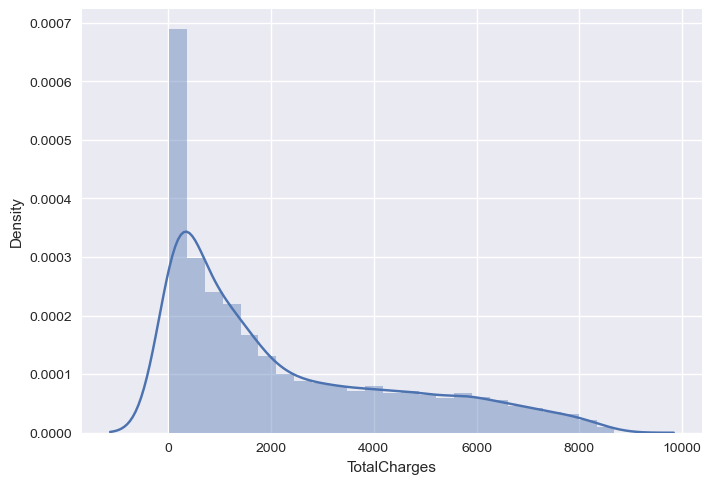

In [9]:
sns.distplot(df2['TotalCharges'])

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges_Log', ylabel='Density'>

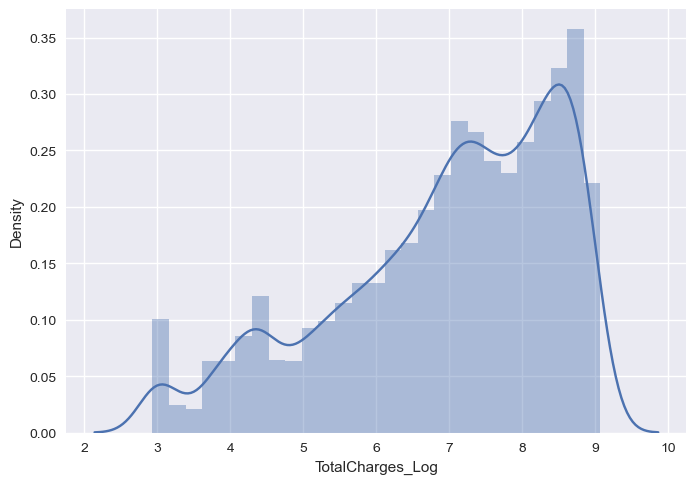

In [10]:
df2['TotalCharges_Log']=np.log(df2['TotalCharges'])
sns.distplot(df2['TotalCharges_Log'])

### Binning


In [11]:
df2['tenure'].min(), df2['tenure'].max()


(1.0, 72.0)

In [12]:
# create bins
bins = [0, 12, 24, 36, 48, 60,72]
# create a new age column
df2['tenureCat'] = pd.cut(df2['tenure'], bins)
df2['tenureCat']



0        (0, 12]
1       (24, 36]
2        (0, 12]
3       (36, 48]
4        (0, 12]
          ...   
7026    (60, 72]
7027    (12, 24]
7028    (60, 72]
7029     (0, 12]
7030     (0, 12]
Name: tenureCat, Length: 7031, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60] < (60, 72]]

In [13]:
bins = [0, 12, 24, 36, 48, 60,72]
bin_labels = [' 1 Year','2 Year','3 Year','4 Year', '5 Year', '6 Year']

df2['tenureCatLabel'] = pd.cut(df2['tenure'], bins=bins, labels=bin_labels)
df2['tenureCatLabel']



0        1 Year
1        3 Year
2        1 Year
3        4 Year
4        1 Year
         ...   
7026     6 Year
7027     2 Year
7028     6 Year
7029     1 Year
7030     1 Year
Name: tenureCatLabel, Length: 7031, dtype: category
Categories (6, object): [' 1 Year' < '2 Year' < '3 Year' < '4 Year' < '5 Year' < '6 Year']

In [14]:
df2['tenureCatLabel'].value_counts()


 1 Year    2175
6 Year     1406
2 Year     1024
3 Year      832
5 Year      832
4 Year      762
Name: tenureCatLabel, dtype: int64

In [15]:
df2.dtypes

customerID              object
tenure                 float64
PhoneService            object
Contract                object
PaperlessBilling        object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                   object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies         object
MonthlyCharges_Log     float64
TotalCharges_Log       float64
tenureCat             category
tenureCatLabel        category
dtype: object

### Drop some columns

In [16]:
df3 = df2.drop(['customerID', 'tenure','MonthlyCharges', 'TotalCharges', 'tenureCat'], axis=1)


In [17]:
df3

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges_Log,TotalCharges_Log,tenureCatLabel
0,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,3.396185,3.396185,1 Year
1,Yes,One year,No,Mailed check,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,4.042174,7.544068,3 Year
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,3.986202,4.683519,1 Year
3,No,One year,No,Bank transfer (automatic),No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,3.744787,7.517928,4 Year
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,4.258446,5.021575,1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Yes,Two year,Yes,Bank transfer (automatic),No,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3.051640,7.257990,6 Year
7027,Yes,One year,Yes,Mailed check,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,4.440296,7.596141,2 Year
7028,Yes,One year,Yes,Credit card (automatic),No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,4.636669,8.904209,6 Year
7029,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,3.387774,5.847739,1 Year


## One hot encoding

In [18]:
df3.dtypes

PhoneService            object
Contract                object
PaperlessBilling        object
PaymentMethod           object
Churn                   object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies         object
MonthlyCharges_Log     float64
TotalCharges_Log       float64
tenureCatLabel        category
dtype: object

In [19]:
df3 = df3.astype({"PhoneService":'category', "Contract":'category', "PaperlessBilling":'category',
                "PaymentMethod":'category',"Churn":'category', "gender":'category',
                "Partner":'category',"Dependents":'category', "MultipleLines":'category',
                "InternetService":'category',"OnlineSecurity":'category',"OnlineBackup":'category',
                "DeviceProtection":'category',"TechSupport":'category',"StreamingTV":'category',
                "StreamingMovies":'category', "tenureCatLabel":'category'})


In [20]:
df3.dtypes

PhoneService          category
Contract              category
PaperlessBilling      category
PaymentMethod         category
Churn                 category
gender                category
SeniorCitizen            int64
Partner               category
Dependents            category
MultipleLines         category
InternetService       category
OnlineSecurity        category
OnlineBackup          category
DeviceProtection      category
TechSupport           category
StreamingTV           category
StreamingMovies       category
MonthlyCharges_Log     float64
TotalCharges_Log       float64
tenureCatLabel        category
dtype: object

In [21]:
categorical_cols = ["PhoneService", "Contract", "PaperlessBilling", "PaymentMethod","Churn", "gender","Partner","Dependents", "MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies", "tenureCatLabel"]


In [22]:
for col in categorical_cols:
    print(f"Unique values of {col} column is : {list(df2[col].unique())}")

Unique values of PhoneService column is : ['No', 'Yes']
Unique values of Contract column is : ['Month-to-month', 'One year', 'Two year']
Unique values of PaperlessBilling column is : ['Yes', 'No']
Unique values of PaymentMethod column is : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Unique values of Churn column is : ['No', 'Yes']
Unique values of gender column is : ['Female', 'Male']
Unique values of Partner column is : ['Yes', 'No']
Unique values of Dependents column is : ['No', 'Yes']
Unique values of MultipleLines column is : ['No phone service', 'No', 'Yes']
Unique values of InternetService column is : ['DSL', 'Fiber optic', 'No']
Unique values of OnlineSecurity column is : ['No', 'Yes', 'No internet service']
Unique values of OnlineBackup column is : ['Yes', 'No', 'No internet service']
Unique values of DeviceProtection column is : ['No', 'Yes', 'No internet service']
Unique values of TechSupport column is : ['No', 'Yes', 'No inter

In [23]:
def one_hot_encode(data, cols, postfix= "_new") -> pd.DataFrame:
    
    """
    This simple function takes a data frame and
    one hot uncode it's columns.
    
    :returns:the data frame but with one hot encode it
    and replaced it's old categorical cols with new cols
    
    :params:takes the data frame and a list of the categorical 
    column names and takes a post fix to add after the new column
    defualt is : "_new"
    """
    
    global new_cols
    new_cols = [col + "_new" for col in cols]
    
    for new_col, col in zip(new_cols, cols):
        data[new_col] = data[col].cat.codes
        
    data = data.drop(cols, axis= 1)
    return data

df3 = one_hot_encode(df3, categorical_cols)

In [24]:
for col in new_cols:
    print(f"Unique values for {col} column after "+ \
          f"one hot encoding is: {list(df3[col].unique())}")

Unique values for PhoneService_new column after one hot encoding is: [0, 1]
Unique values for Contract_new column after one hot encoding is: [0, 1, 2]
Unique values for PaperlessBilling_new column after one hot encoding is: [1, 0]
Unique values for PaymentMethod_new column after one hot encoding is: [2, 3, 0, 1]
Unique values for Churn_new column after one hot encoding is: [0, 1]
Unique values for gender_new column after one hot encoding is: [0, 1]
Unique values for Partner_new column after one hot encoding is: [1, 0]
Unique values for Dependents_new column after one hot encoding is: [0, 1]
Unique values for MultipleLines_new column after one hot encoding is: [1, 0, 2]
Unique values for InternetService_new column after one hot encoding is: [0, 1, 2]
Unique values for OnlineSecurity_new column after one hot encoding is: [0, 2, 1]
Unique values for OnlineBackup_new column after one hot encoding is: [2, 0, 1]
Unique values for DeviceProtection_new column after one hot encoding is: [0, 2, 

In [25]:
df3

,SeniorCitizen,MonthlyCharges_Log,TotalCharges_Log,PhoneService_new,Contract_new,PaperlessBilling_new,PaymentMethod_new,Churn_new,gender_new,Partner_new,Dependents_new,MultipleLines_new,InternetService_new,OnlineSecurity_new,OnlineBackup_new,DeviceProtection_new,TechSupport_new,StreamingTV_new,StreamingMovies_new,tenureCatLabel_new
0,0,3.396185,3.396185,0,0,1,2,0,0,1,0,1,0,0,2,0,0,0,0,0
1,0,4.042174,7.544068,1,1,0,3,0,1,0,0,0,0,2,0,2,0,0,0,2
2,0,3.986202,4.683519,1,0,1,3,1,1,0,0,0,0,2,2,0,0,0,0,0
3,0,3.744787,7.517928,0,1,0,0,0,1,0,0,1,0,2,0,2,2,0,0,3
4,0,4.258446,5.021575,1,0,1,2,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,0,3.051640,7.257990,1,2,1,0,0,0,0,0,0,2,1,1,1,1,1,1,5
7027,0,4.440296,7.596141,1,1,1,3,0,1,1,1,2,0,2,0,2,2,2,2,1
7028,0,4.636669,8.904209,1,1,1,1,0,0,1,1,2,1,0,2,2,0,2,2,5
7029,0,3.387774,5.847739,0,0,1,2,0,0,1,1,1,0,2,0,0,0,0,0,0


### Outlier Detection for numerical Data

Text(0.5, 1.0, 'Box plot of Monthly Charges (Log Transformed)')

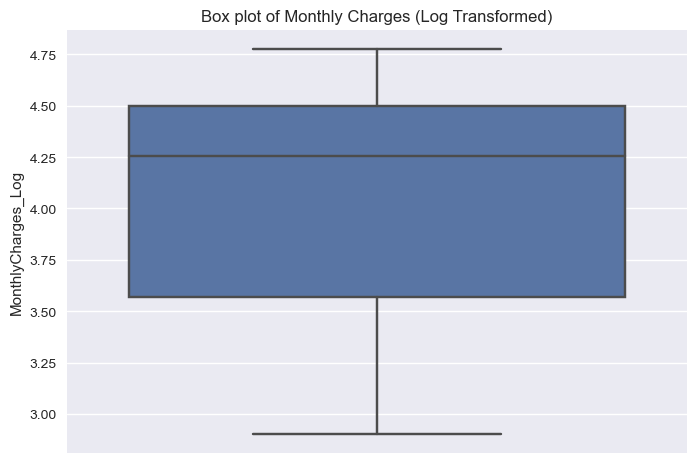

In [26]:
sns.boxplot(y=df3['MonthlyCharges_Log'])
plt.title("Box plot of Monthly Charges (Log Transformed)")

Text(0.5, 1.0, 'Box plot of Total Charges (Log Transformed)')

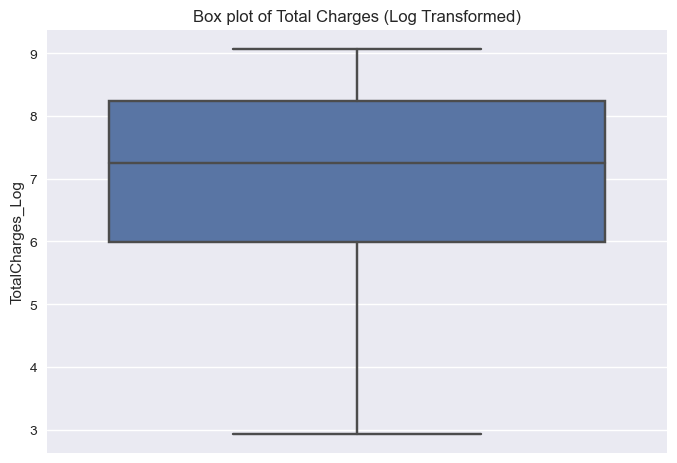

In [27]:
sns.boxplot(y=df3['TotalCharges_Log'])
plt.title("Box plot of Total Charges (Log Transformed)")

Outlier Detection:
Performed OD on the numerical features Monthly Charges and Total Charges (Log Transformed). There were no outliers detected in the data. So we will proceed to next step.

### Correlation

<AxesSubplot:>

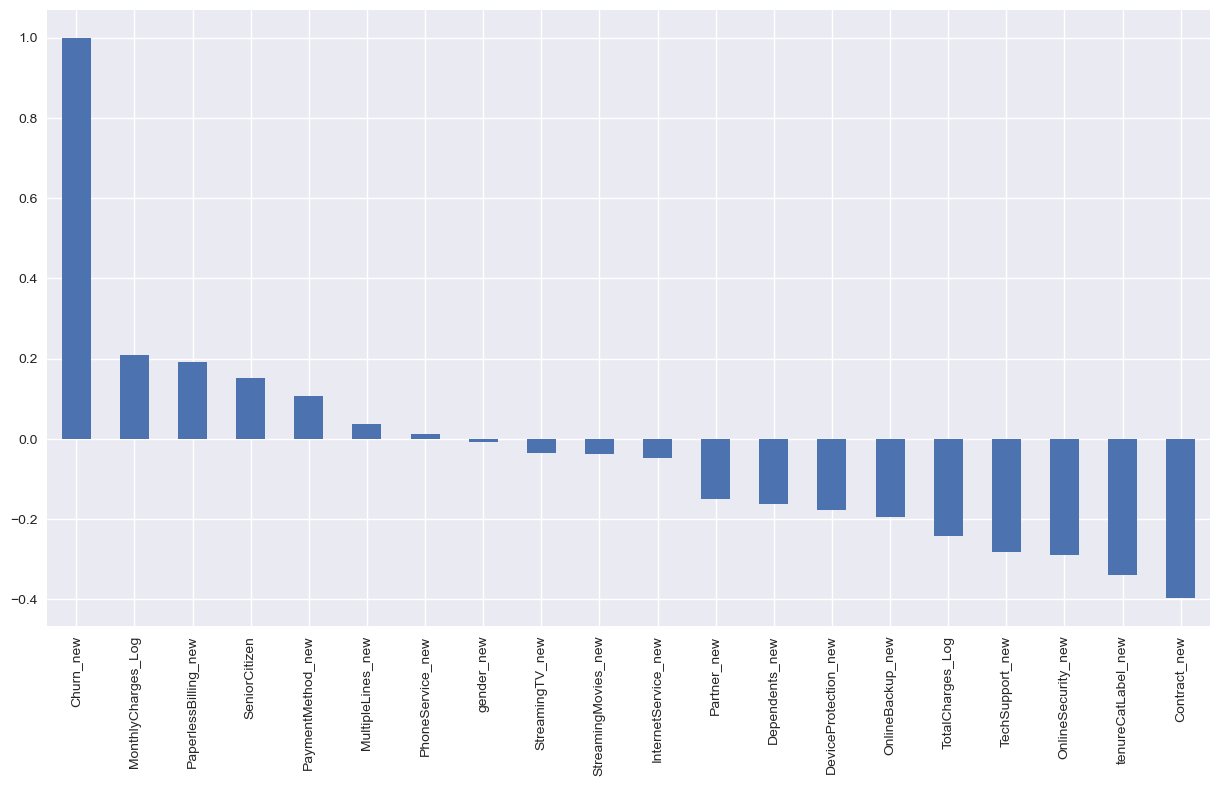

In [28]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df3.corr()['Churn_new'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

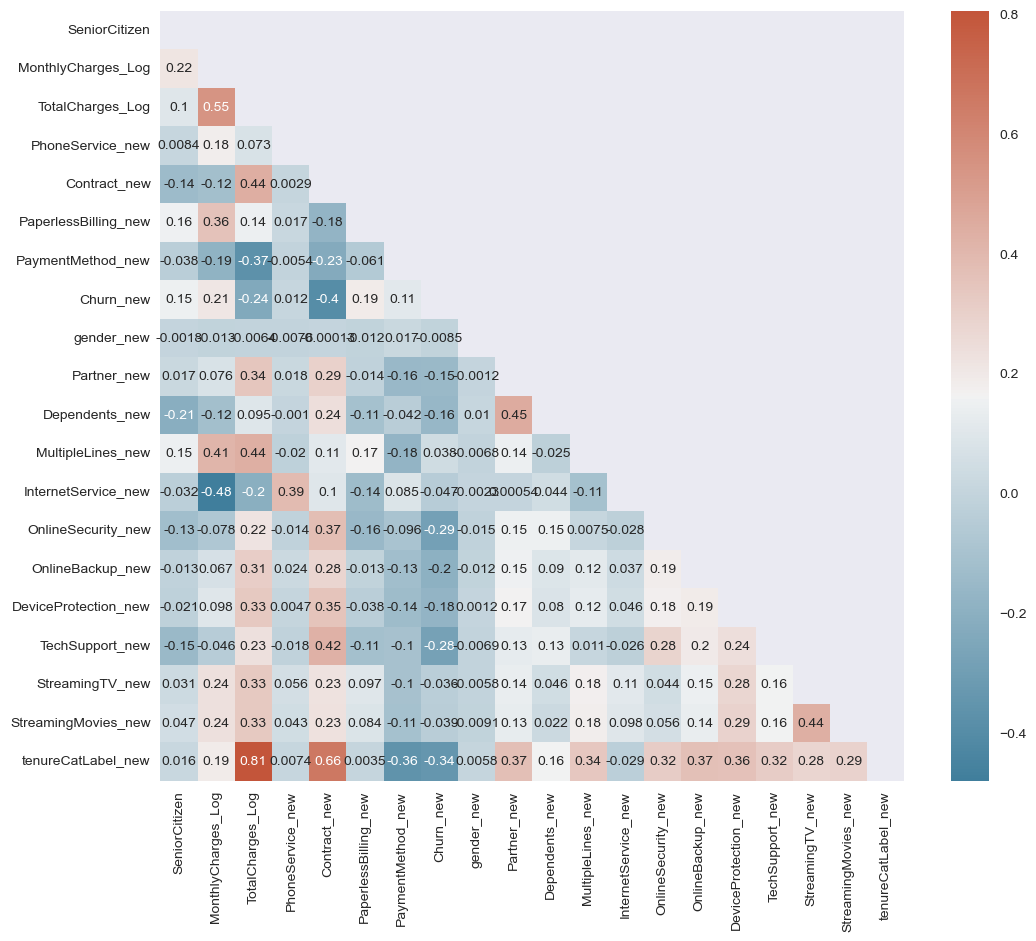

In [29]:
# Checking the correlation between features
corr = df3.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
#fig = px.imshow(corr,width=1000, height=1000)
#fig.show()

MonthlyCharges_Log, TotalCharges_Log, PhoneService_new, Contract_new, PaymentMethod_new, gender_new

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. The color-coding of the cells makes it easy to identify relationships between variables at a glance. For the heat map of our data, it shows that:
1. Total Charges Log and Tenure have a strong positive correlations. This means that as tenure increase so does the total charges. This might be due to the fact that as customers stay loyal to the company they choose to get mutliple services from the same provider which causes the total charges to increase as well. As this is an important relationship we will not remove either of the variables and see how our model performs moving forward. 
2. New Contract and Tenure category have a positive relationship. 

# Logistic Regression

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [33]:
df4 = df3.copy()

In [34]:
# Defining X and y
y=df4['Churn_new']
X=df4.drop('Churn_new',axis=1)
# Adding the column of ones so it can provide intercept.
X=sm.add_constant(X)
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Log1=sm.Logit(y_train,X_train,random_state=0)
result=Log1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.408870
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_new   No. Observations:                 5624
Model:                          Logit   Df Residuals:                     5604
Method:                           MLE   Df Model:                           19
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.2952
Time:                        11:58:05   Log-Likelihood:                -2299.5
converged:                       True   LL-Null:                       -3262.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.9358      0.410    -12.047      0.000      -5.739      -4.133

c:\Users\zarah\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
c:\Users\zarah\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


In [35]:
# Fetching the statistics
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues, 'odds_ratio': np.exp(result.params)})
stat_df

,coefficients,p-value,odds_ratio
const,-4.935784,2.012471e-33,0.007185
SeniorCitizen,0.292953,2.024626e-03,1.340380
MonthlyCharges_Log,2.152978,5.998089e-57,8.610465
TotalCharges_Log,-0.624265,7.395578e-33,0.535655
PhoneService_new,-1.029955,4.318053e-10,0.357023
Contract_new,-0.856594,4.810154e-23,0.424606
PaperlessBilling_new,0.393374,3.476821e-06,1.481973
PaymentMethod_new,0.027548,4.981534e-01,1.027931
gender_new,0.018970,7.958140e-01,1.019151
Partner_new,0.098876,2.662175e-01,1.103929


In [36]:
# Condition for significant parameters
significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params= significant_params.drop('const')
significant_params

Index(['SeniorCitizen', 'MonthlyCharges_Log', 'TotalCharges_Log',
       'PhoneService_new', 'Contract_new', 'PaperlessBilling_new',
       'MultipleLines_new', 'InternetService_new', 'OnlineSecurity_new',
       'OnlineBackup_new', 'TechSupport_new'],
      dtype='object')

In [37]:
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))

Total number of parameters: 20 
Number of Significant Parameters: 11


In [38]:
# Odds Ratio
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']

MonthlyCharges_Log      8.610465
InternetService_new     1.547378
PaperlessBilling_new    1.481973
SeniorCitizen           1.340380
MultipleLines_new       1.153083
OnlineBackup_new        0.882745
OnlineSecurity_new      0.824053
TechSupport_new         0.809942
TotalCharges_Log        0.535655
Contract_new            0.424606
PhoneService_new        0.357023
Name: odds_ratio, dtype: float64

In [39]:
y_pred=result.predict(X_test)


In [40]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

print('MAE for Log1:',mean_absolute_error(y_test, y_pred))
print('R2 for Log1:', r2_score(y_test, y_pred))
print('EV for Log1:', explained_variance_score(y_test, y_pred))

MAE for Log1: 0.2652628212783665
R2 for Log1: 0.31244300518519097
EV for Log1: 0.3125464380397781


## Refining Log1 Model to Log2 Model

In [41]:
# Defining X and y
y2=df4['Churn_new']
X2=df4[significant_params]

# Adding the column of ones so it can provide intercept.
X2=sm.add_constant(X2)

X2=sm.add_constant(X2)
#Splitting the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

Log2=sm.Logit(y2_train,X2_train)
result2=Log2.fit()
print(result2.summary())


stat_df2=pd.DataFrame({'coefficients':result.params, 'p-value':result.pvalues, 'odds_ratio':np.exp(result.params)})

significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params=significant_params.drop('const')
significant_params

Optimization terminated successfully.
         Current function value: 0.409654
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_new   No. Observations:                 5624
Model:                          Logit   Df Residuals:                     5612
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.2939
Time:                        11:58:36   Log-Likelihood:                -2303.9
converged:                       True   LL-Null:                       -3262.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.0816      0.367    -13.865      0.000      -5.800      -4.363

Index(['SeniorCitizen', 'MonthlyCharges_Log', 'TotalCharges_Log',
       'PhoneService_new', 'Contract_new', 'PaperlessBilling_new',
       'MultipleLines_new', 'InternetService_new', 'OnlineSecurity_new',
       'OnlineBackup_new', 'TechSupport_new'],
      dtype='object')

In [42]:
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))
stat_df2.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']

Total number of parameters: 20 
Number of Significant Parameters: 11


MonthlyCharges_Log      8.610465
InternetService_new     1.547378
PaperlessBilling_new    1.481973
SeniorCitizen           1.340380
MultipleLines_new       1.153083
OnlineBackup_new        0.882745
OnlineSecurity_new      0.824053
TechSupport_new         0.809942
TotalCharges_Log        0.535655
Contract_new            0.424606
PhoneService_new        0.357023
Name: odds_ratio, dtype: float64

From the above analysis, it can be deduced that customers who are paying higher monthly charges are more likely to churn. This is because in the short-term they might find the cost to be a more determining factor for loyalty to the brand. As customers add more services such as Online Backup, Online Security, Tech support, they are less likely to churn. Furthermore, we can see that Total Charges is a better measure to retain customer. This is because when companies bundle together services and offer promotional pricing based on multiple services, they might be getting a better deal. Lastly, it is much easier to prevent Customers with new contracts and New Phone Service from churning. 

# Export DF to Next Step

In [43]:
df_model = df4.copy()

In [44]:
df_model.to_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Final Project\Churn Project Files\DataFiles\df_model.csv', index=False, header=True)